# Customer Segmentation and Analysis


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Importing Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings("ignore")

## Data Exploration

In [ ]:
df = X
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 13)

In [ ]:
df.describe(include='all') #ver toda la información de todas las columnas, usar la opción 'all'

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.dtypes #para mostrar los tipos de datos de las columnas

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [ ]:
df['Magnesium'] = df['Magnesium'].astype(float) #convertir la columna 'Magnesium' en float
df.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                       float64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [ ]:
df['Proline'] = df['Proline'].astype(float) #convertir la columna 'Proline' en float
df.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                       float64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                         float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    float64
dtypes: fl

####Look for missing values

In [ ]:
df.isnull().sum() #para cada columna, la suma de sus valores nulos

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

## Data Visualization

### Histograms

In [ ]:
print(sorted(df['Alcohol'].unique())) #ver los valores únicos de Alcohol ascendentemente
print(len(df['Alcohol'].unique())) #la cantidad de números de Alcohol

print(sorted(df['Malicacid'].unique())) #ver los valores únicos de Malicacid ascendentemente
print(len(df['Malicacid'].unique())) #la cantidad de números de Malicacid

print(sorted(df['Ash'].unique())) #ver los valores únicos de Ash ascendentemente
print(len(df['Ash'].unique())) #la cantidad de números de Ash

print(sorted(df['Alcalinity_of_ash'].unique())) #ver los valores únicos de Alcalinity_of_ash ascendentemente
print(len(df['Alcalinity_of_ash'].unique())) #la cantidad de números de Alcalinity_of_ash

print(sorted(df['Magnesium'].unique())) #ver los valores únicos de Magnesium ascendentemente
print(len(df['Magnesium'].unique())) #la cantidad de números de Magnesium

print(sorted(df['Total_phenols'].unique())) #ver los valores únicos de Total_phenols ascendentemente
print(len(df['Total_phenols'].unique())) #la cantidad de números de Total_phenols

print(sorted(df['Flavanoids'].unique())) #ver los valores únicos de Flavanoids ascendentemente
print(len(df['Flavanoids'].unique())) #la cantidad de números de Flavanoids

print(sorted(df['Nonflavanoid_phenols'].unique())) #ver los valores únicos de Nonflavanoid_phenols ascendentemente
print(len(df['Nonflavanoid_phenols'].unique())) #la cantidad de números de Nonflavanoid_phenols

print(sorted(df['Proanthocyanins'].unique())) #ver los valores únicos de Proanthocyanins ascendentemente
print(len(df['Proanthocyanins'].unique())) #la cantidad de números de Proanthocyanins

print(sorted(df['Color_intensity'].unique())) #ver los valores únicos de Color_intensity ascendentemente
print(len(df['Color_intensity'].unique())) #la cantidad de números de Color_intensity

print(sorted(df['0D280_0D315_of_diluted_wines'].unique())) #ver los valores únicos de dificulted wines ascendentemente
print(len(df['0D280_0D315_of_diluted_wines'].unique())) #la cantidad de números de dificulted wines

print(sorted(df['Proline'].unique())) #ver los valores únicos de Proline ascendentemente
print(len(df['Proline'].unique())) #la cantidad de números de Proline


[11.03, 11.41, 11.45, 11.46, 11.56, 11.61, 11.62, 11.64, 11.65, 11.66, 11.76, 11.79, 11.81, 11.82, 11.84, 11.87, 11.96, 12.0, 12.04, 12.07, 12.08, 12.16, 12.17, 12.2, 12.21, 12.22, 12.25, 12.29, 12.33, 12.34, 12.36, 12.37, 12.42, 12.43, 12.45, 12.47, 12.51, 12.52, 12.53, 12.58, 12.6, 12.64, 12.67, 12.69, 12.7, 12.72, 12.77, 12.79, 12.81, 12.82, 12.84, 12.85, 12.86, 12.87, 12.88, 12.93, 12.96, 12.99, 13.03, 13.05, 13.07, 13.08, 13.11, 13.16, 13.17, 13.2, 13.23, 13.24, 13.27, 13.28, 13.29, 13.3, 13.32, 13.34, 13.36, 13.39, 13.4, 13.41, 13.45, 13.48, 13.49, 13.5, 13.51, 13.52, 13.56, 13.58, 13.62, 13.63, 13.64, 13.67, 13.68, 13.69, 13.71, 13.72, 13.73, 13.74, 13.75, 13.76, 13.77, 13.78, 13.82, 13.83, 13.84, 13.86, 13.87, 13.88, 13.9, 13.94, 14.02, 14.06, 14.1, 14.12, 14.13, 14.16, 14.19, 14.2, 14.21, 14.22, 14.23, 14.3, 14.34, 14.37, 14.38, 14.39, 14.75, 14.83]
126
[0.74, 0.89, 0.9, 0.92, 0.94, 0.98, 0.99, 1.01, 1.07, 1.09, 1.1, 1.13, 1.17, 1.19, 1.21, 1.24, 1.25, 1.29, 1.33, 1.34, 1.35, 

###Seaborn

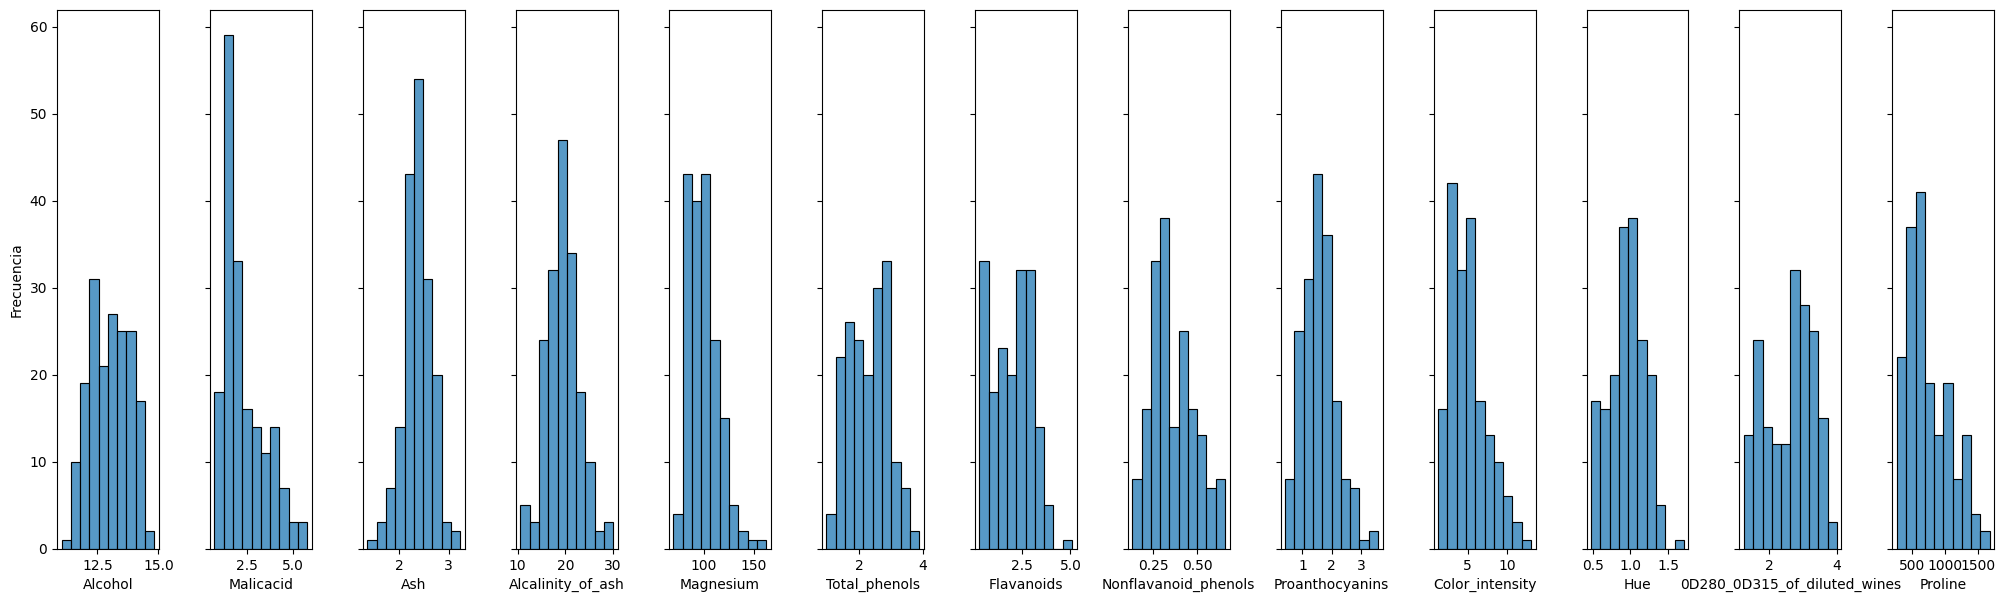

In [ ]:
def plot_columns(df, columns):
    # Ajusta el tamaño de la figura según la cantidad de columnas
    fig, axes = plt.subplots(1, len(columns), figsize=(25, 7), sharey=True)

    for i, c in enumerate(columns):
        sns.histplot(df[c], bins=10, kde=False, ax=axes[i])
        axes[i].set_xlabel(c)
        axes[i].set_ylabel('Frecuencia')

    # Ajusta el espaciado entre subgráficos
    plt.subplots_adjust(wspace=0.5)
    plt.show()

columns = ['Alcohol',
            'Malicacid',
            'Ash',
            'Alcalinity_of_ash',
            'Magnesium',
            'Total_phenols',
            'Flavanoids',
            'Nonflavanoid_phenols',
            'Proanthocyanins',
            'Color_intensity',
            'Hue',
            '0D280_0D315_of_diluted_wines',
            'Proline']
plot_columns(df, columns)

###Matplotlib

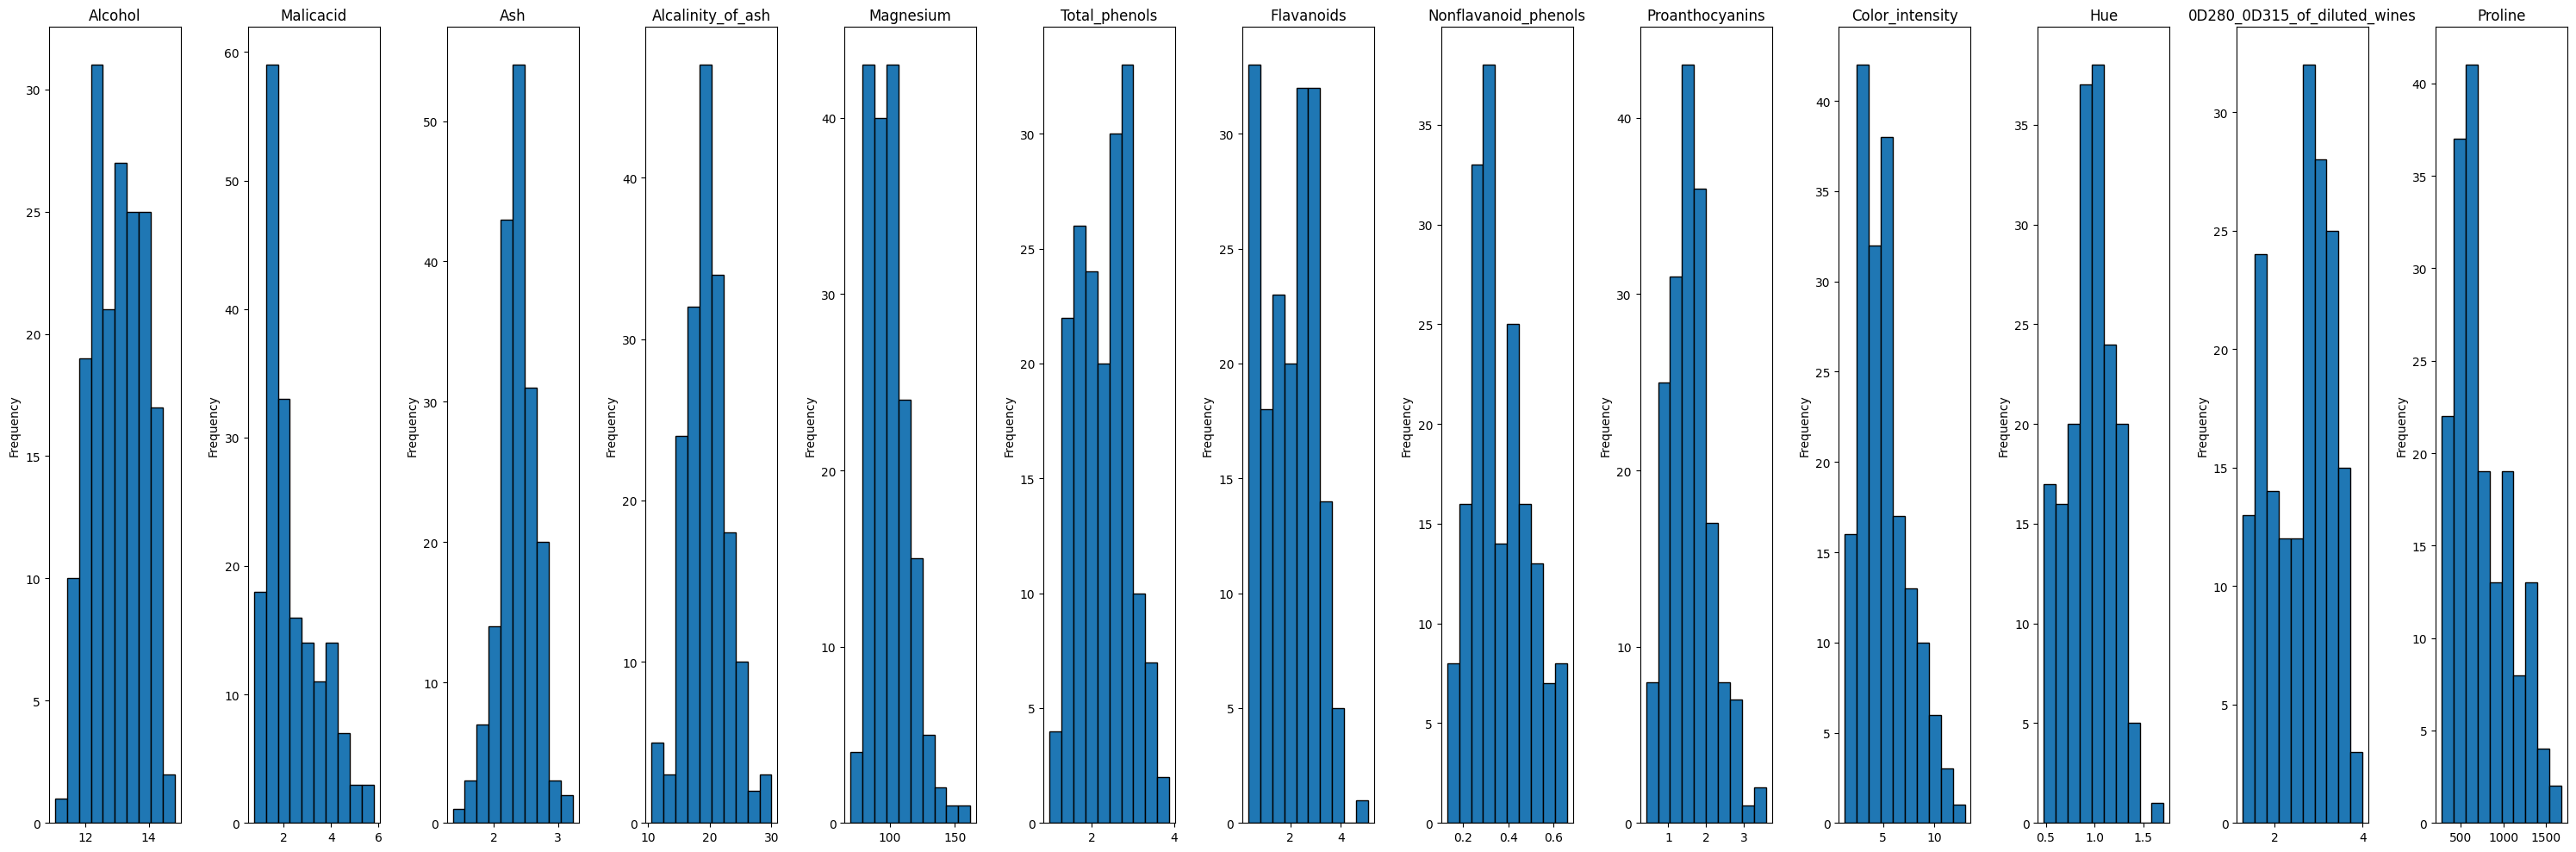

In [ ]:
plt.figure(figsize=(30, 10))
i = 0

for c in columns:
    i += 1
    plt.subplot(1, 13, i)
    df[c].plot.hist(edgecolor='black')  # Ajusta según sea necesario
    plt.title('{}'.format(c))

plt.tight_layout(w_pad=2)  # Ajusta w_pad para controlar el espaciado horizontal
plt.show()

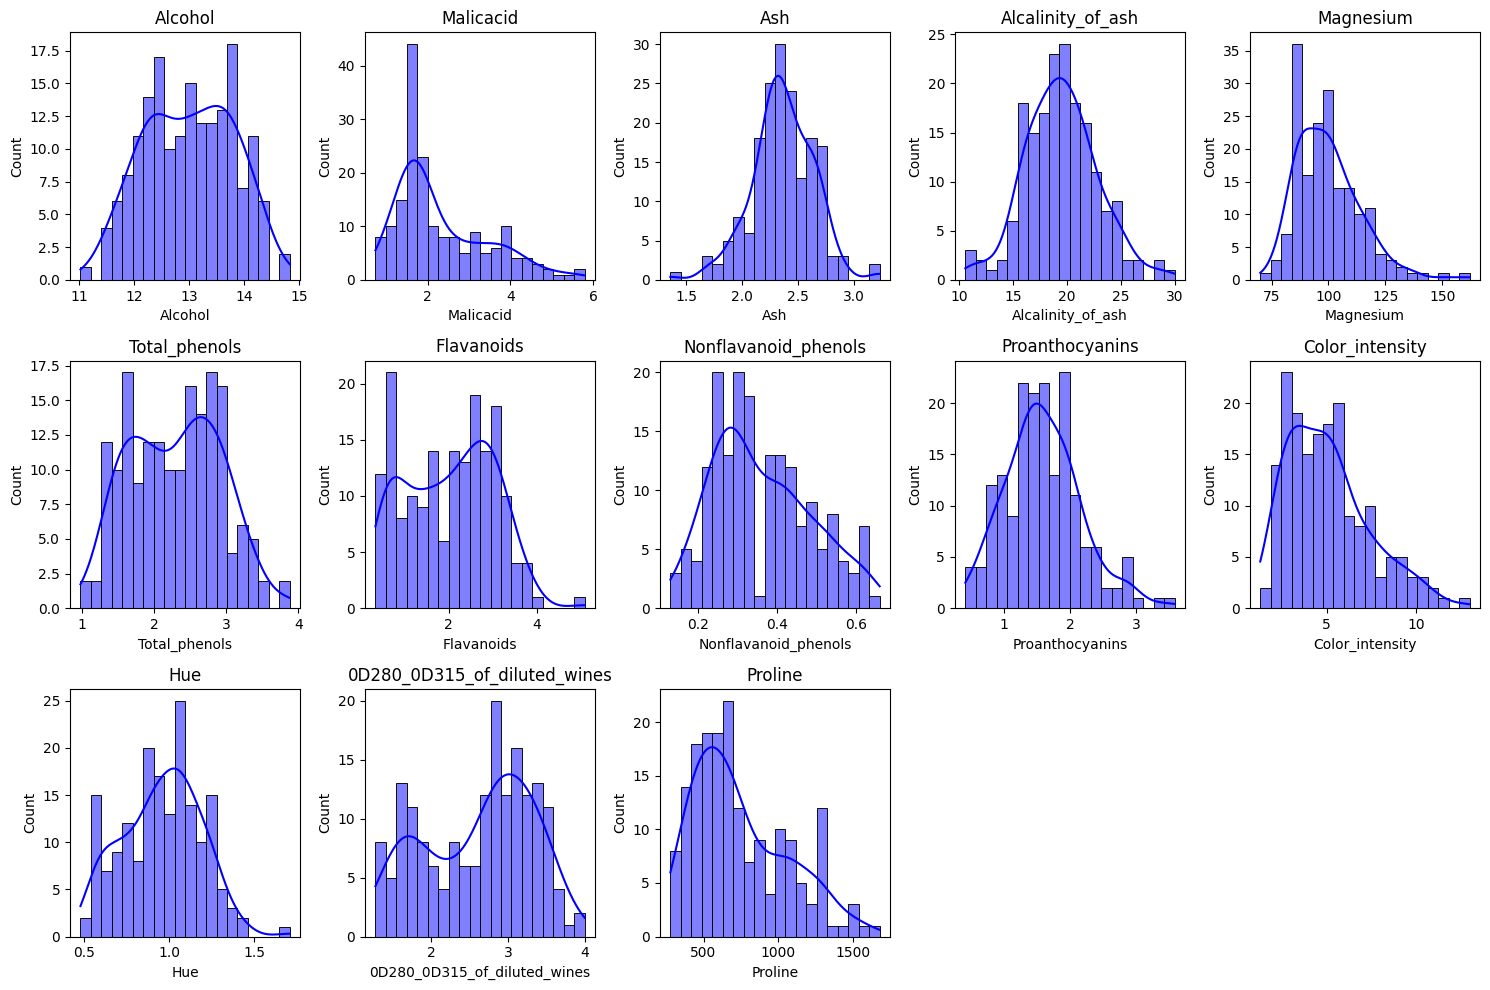

In [ ]:
# Displot para visualizar la distribución de cada variable
plt.figure(figsize=(15, 10))
for i, c in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(df[c], kde=True, color='blue', bins=20, edgecolor='black')
    plt.title(c)
plt.tight_layout()
plt.show()

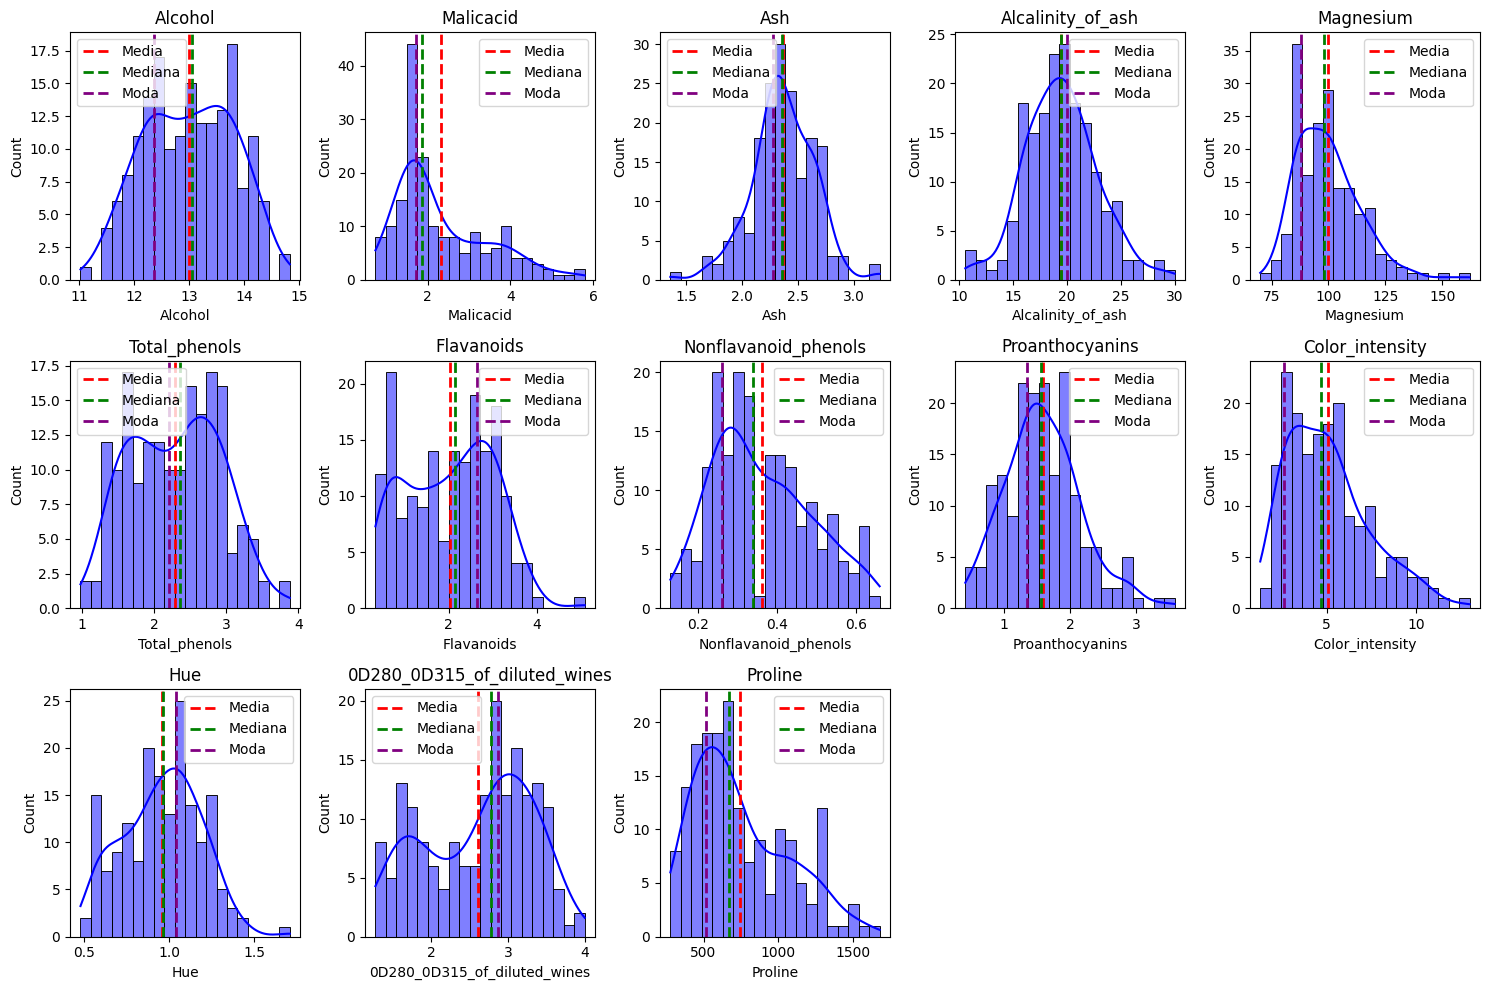

In [ ]:
# Displot para visualizar la distribución de cada variable con líneas para media, mediana y moda
plt.figure(figsize=(15, 10))
for i, c in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(df[c], kde=True, color='blue', bins=20, edgecolor='black')

    # Línea para la media
    plt.axvline(df[c].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')

    # Línea para la mediana
    plt.axvline(df[c].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')

    # Línea para la moda
    mode_value = df[c].mode().values[0]
    plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Moda')

    plt.title(c)
    plt.legend()

plt.tight_layout()
plt.show()


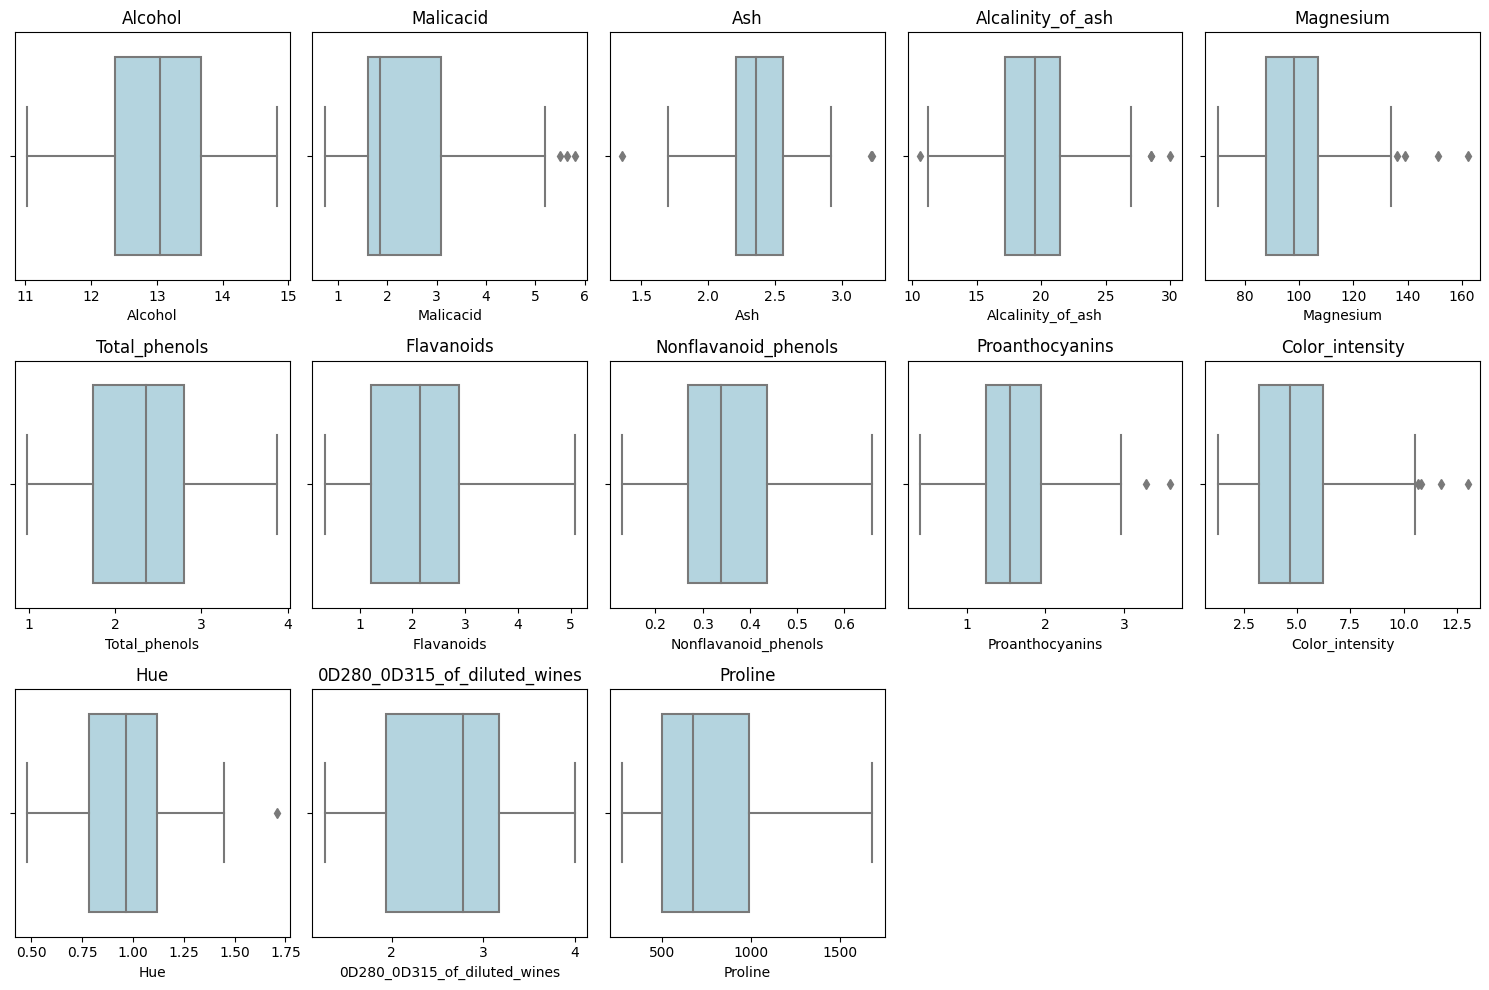

In [ ]:
# Boxplots para visualizar la distribución de cada variable
plt.figure(figsize=(15, 10))
for i, c in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[c], color='lightblue')

    plt.title(c)

plt.tight_layout()
plt.show()

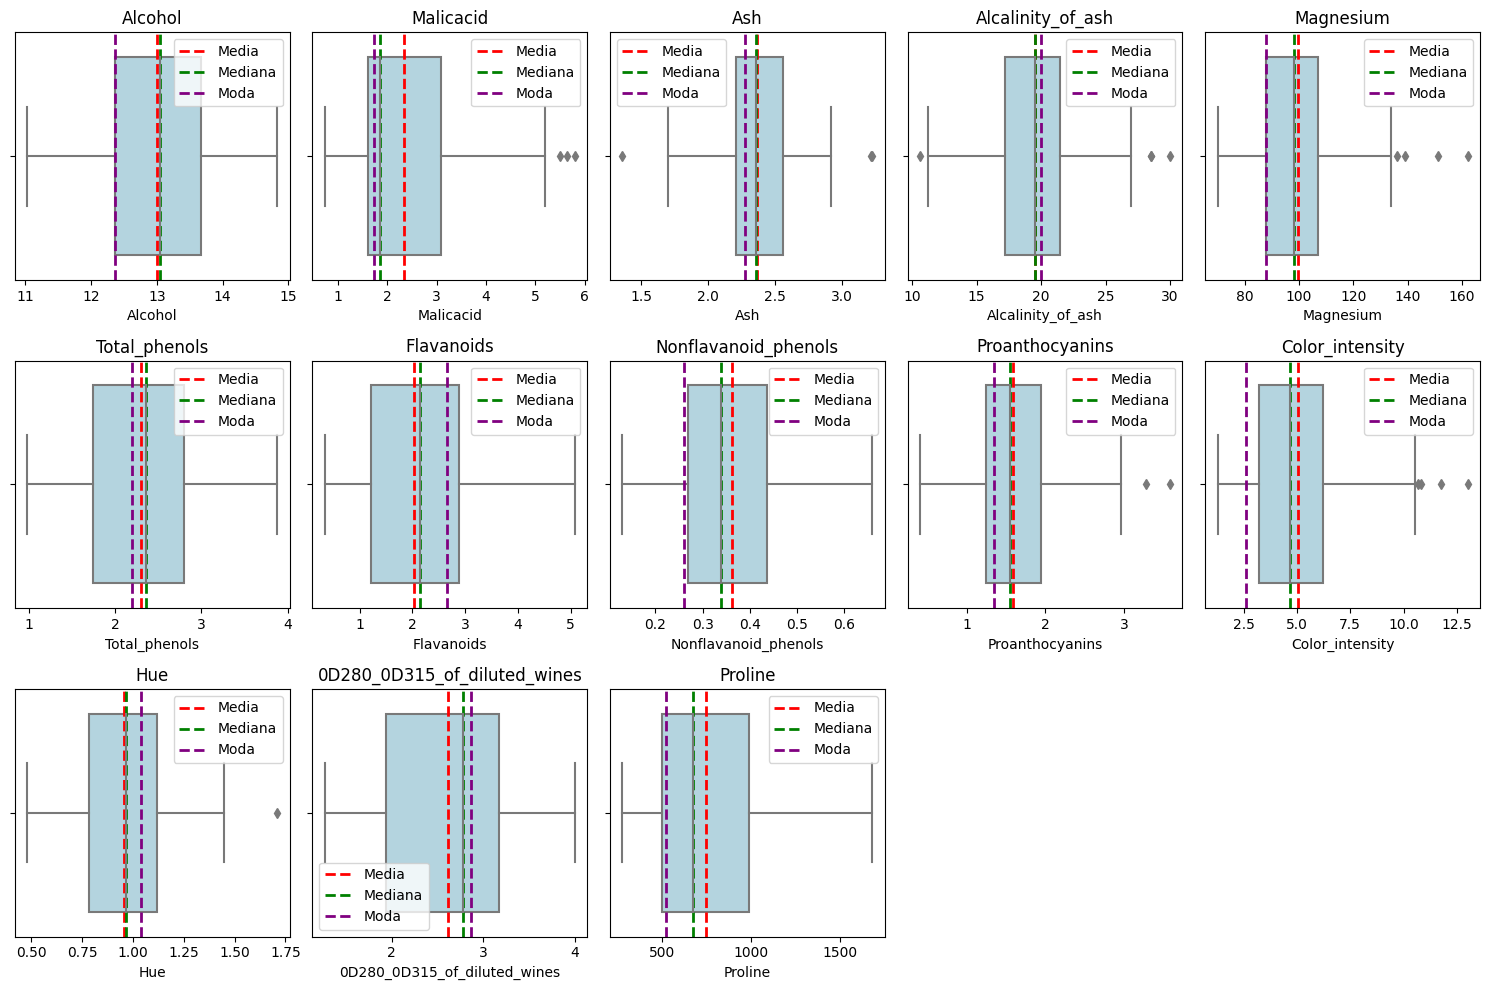

In [ ]:
# Boxplots para visualizar la distribución de cada variable con líneas para media, mediana y moda
plt.figure(figsize=(15, 10))
for i, c in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[c], color='lightblue')

    # Línea para la media
    plt.axvline(df[c].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')

    # Línea para la mediana
    plt.axvline(df[c].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')

    # Línea para la moda
    mode_value = df[c].mode().values[0]
    plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Moda')

    plt.title(c)
    plt.legend()

plt.tight_layout()
plt.show()

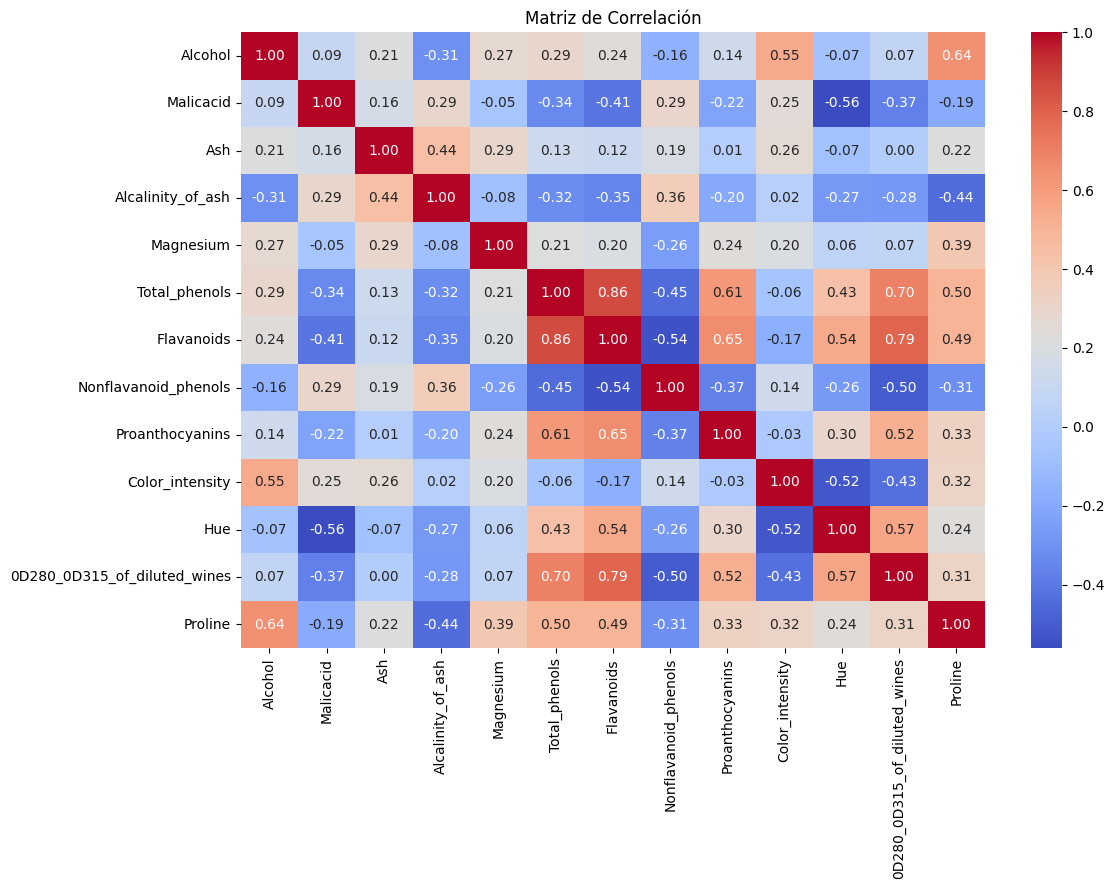

In [ ]:
# Etiquetas de columnas
df.columns = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
              'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
              'Proanthocyanins', 'Color_intensity', 'Hue',
              '0D280_0D315_of_diluted_wines', 'Proline']

# Gráfico de correlación
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

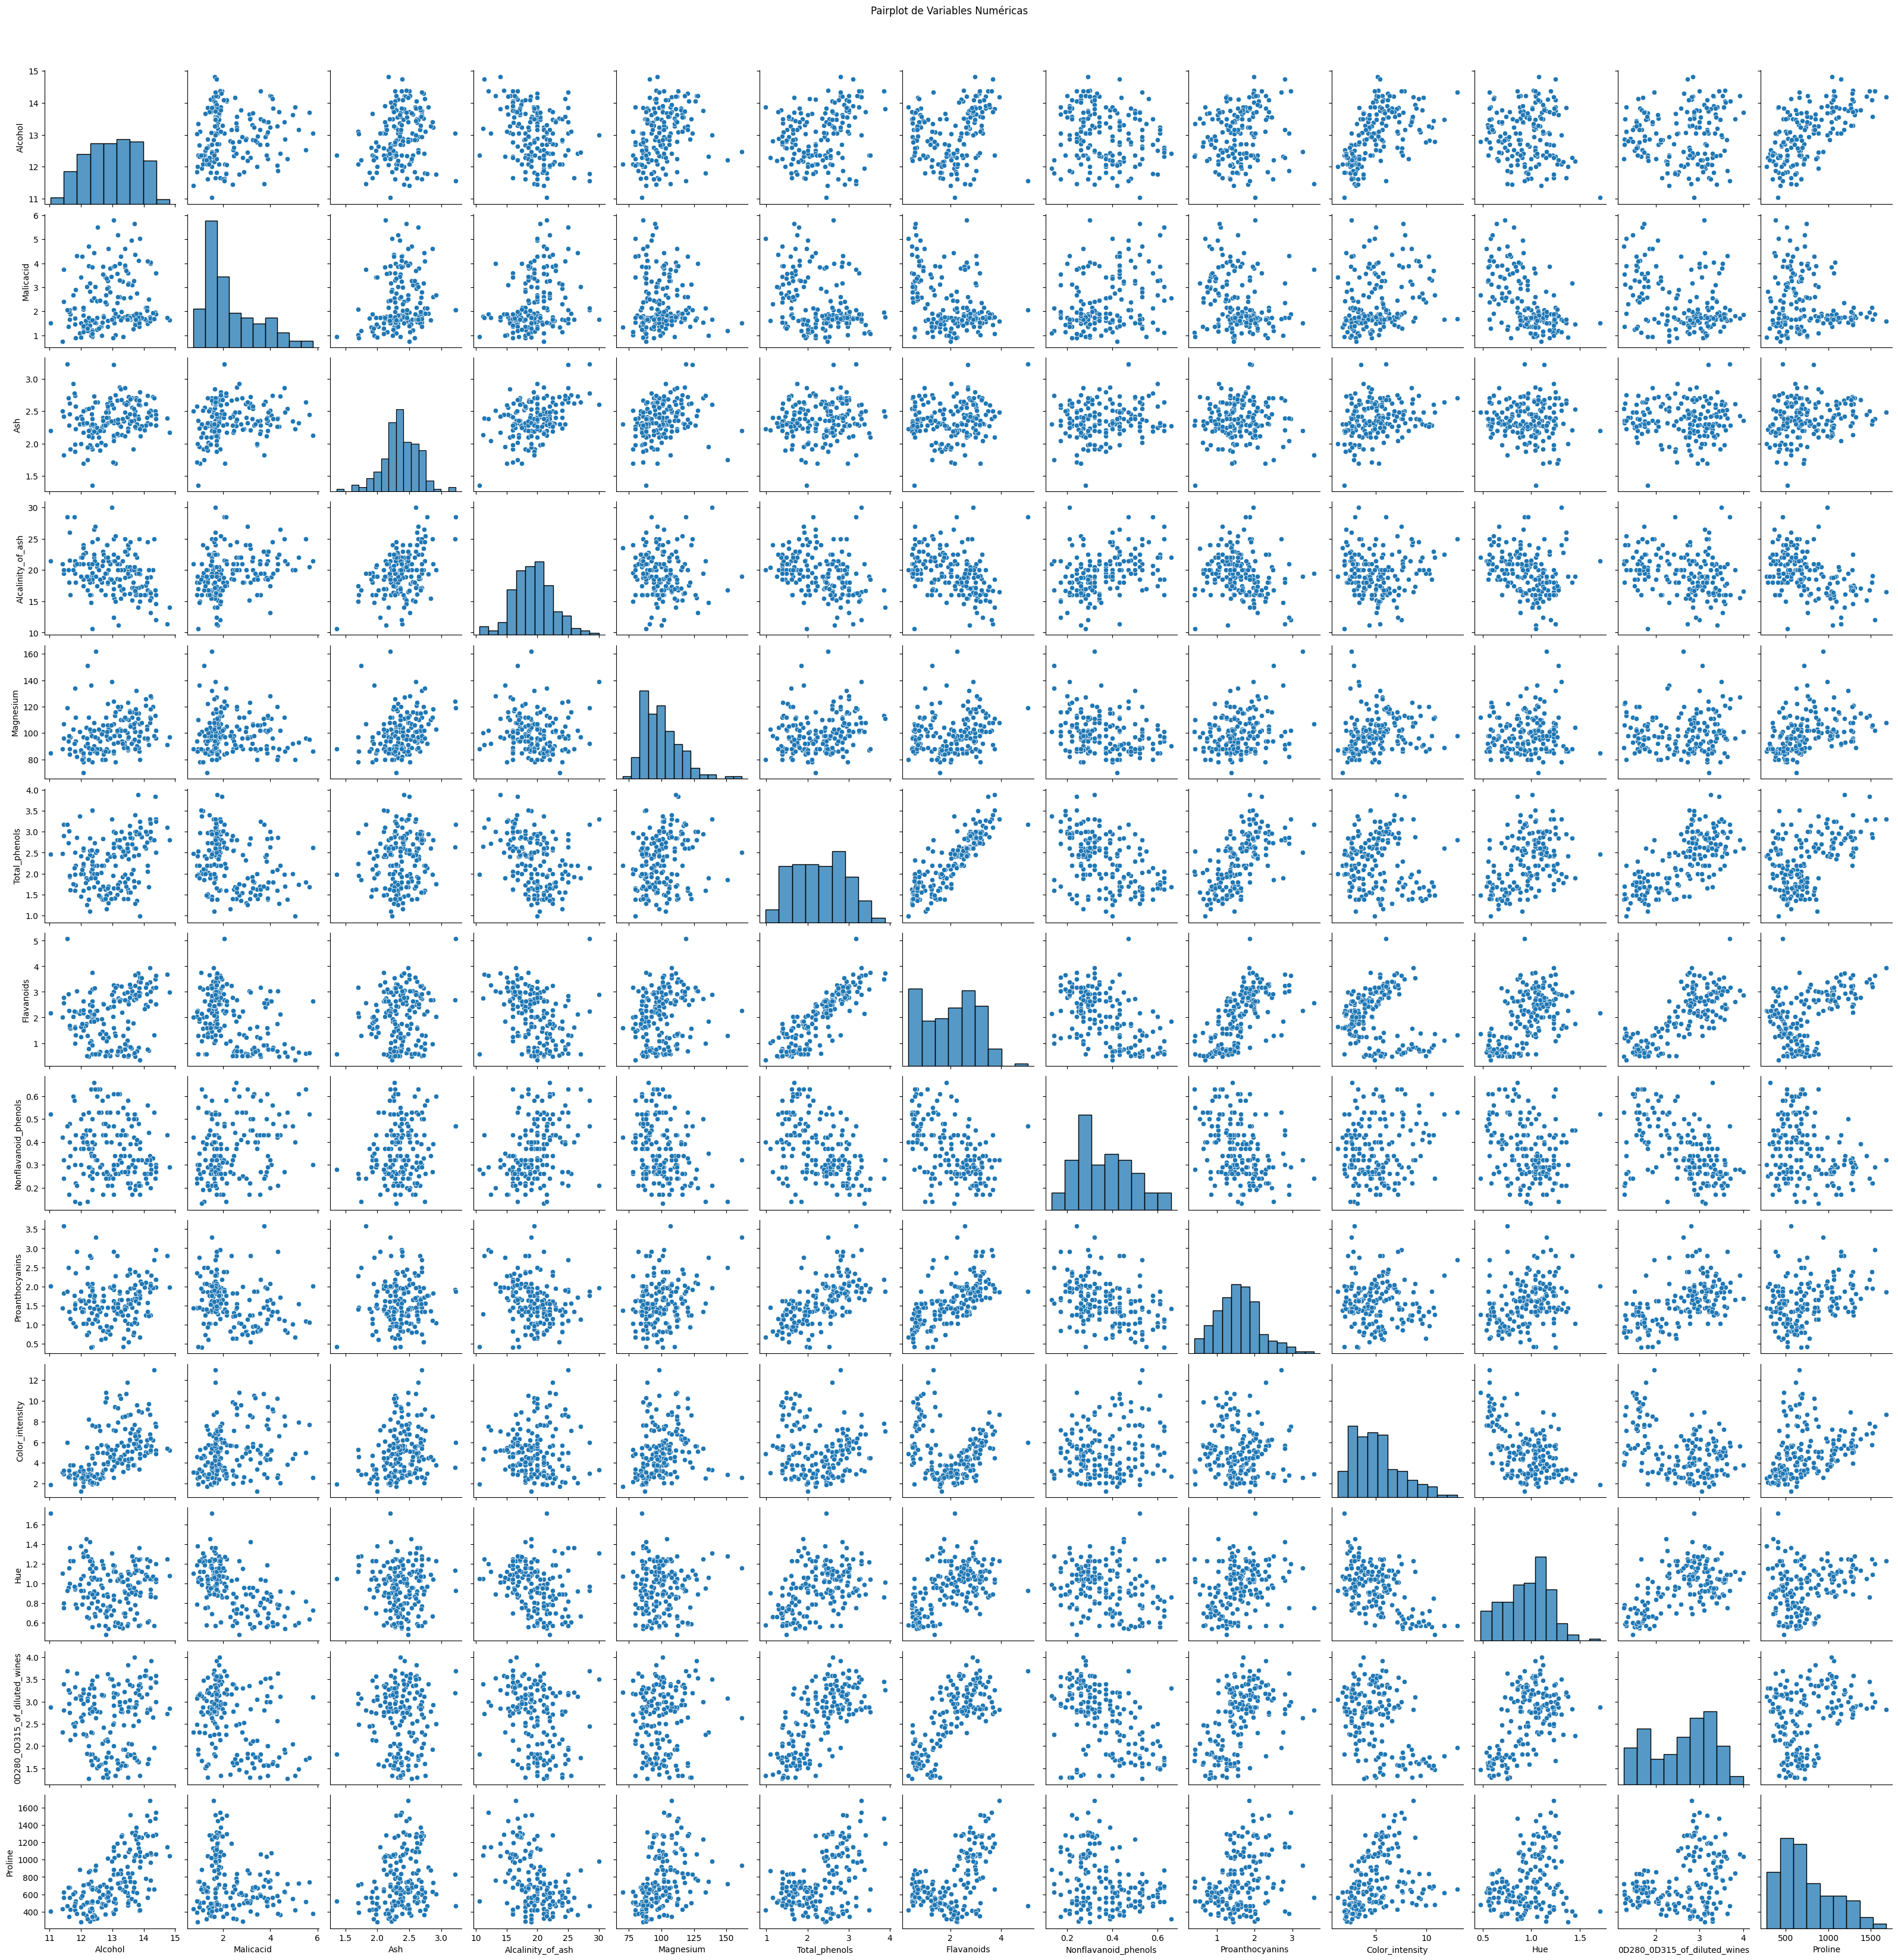

In [ ]:
# Pairplot para visualizar relaciones entre pares de variables
sns.pairplot(df)
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

In [ ]:
# COnociendo la corelacion entre cada par de elementos
# Para el analisis kmeans usaremos aquellos con la corelacion mas fuerte
# En este caso Flavanoids vs Total_phenols y 0D280_0D315_of_diluted_wines

df_ = df[['Flavanoids', 'Total_phenols']] #seleccionar las columnas para calcular

In [ ]:
df_as = df[['Flavanoids', 'Total_phenols']] #seleccionar las columnas para calcular

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_ = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ = scaler.fit_transform(df_)

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) #inicializar el kmeans para K=6 clusters
kmeans.fit(df_) #aplicar kmeans a la data

KMeans(n_clusters=5)

In [ ]:
kmeans.labels_ #devolver los valores de cluster para cada cliente

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4,
       1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 4, 0, 3,
       4, 0, 0, 3, 0, 3, 0, 3, 4, 0, 0, 0, 3, 4, 0, 4, 0, 2, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 3, 3, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 3, 4, 4, 4, 4, 4, 0, 0, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_ #propiedad de kmeans que obtiene los centroides de los clusters
centroids

array([[-0.9083743 , -0.66301249, -0.64979845,  0.14715652, -0.67872239,
        -0.51092322, -0.28916216,  0.40003838, -0.47113345, -0.89751345,
         0.60304217,  0.02657456, -0.78885724],
       [ 1.0773644 , -0.34931575,  0.10284049, -1.00129391,  0.45738662,
         0.99009812,  1.04976172, -0.72140209,  0.6638096 ,  0.36207249,
         0.40298973,  0.81223766,  1.35123178],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461],
       [ 0.0833523 , -0.57806577,  0.8447573 ,  0.28178429,  1.13821498,
         0.48166395,  0.63466651, -0.31806562,  0.55992634, -0.37077195,
         0.81762482,  0.52694924,  0.43418928],
       [-0.83530838,  0.37347426, -0.33525637,  0.10601747, -0.55760437,
         0.64748237,  0.54689113, -0.53708446,  0.6109537 , -0.81275136,
        -0.00986905,  0.6688123 , -0.68177864]])

In [ ]:
from matplotlib import scale
centroids = scaler.inverse_transform(centroids)
centroids

array([[0.32506579, 0.16951581, 0.44318182, 0.48376289, 0.21820652,
        0.34353448, 0.29562236, 0.53113208, 0.28769716, 0.1453285 ,
        0.4999187 , 0.49835165, 0.15775678],
       [0.74810282, 0.23857891, 0.55328939, 0.28662191, 0.39408493,
        0.66655974, 0.57697969, 0.26853883, 0.4920402 , 0.39378125,
        0.46284742, 0.7021041 , 0.63709651],
       [0.55832438, 0.5147213 , 0.57470261, 0.55869977, 0.31543922,
        0.24074595, 0.09661586, 0.60531382, 0.23755875, 0.51734345,
        0.16741331, 0.15392091, 0.24932312],
       [0.53634085, 0.18821758, 0.66182837, 0.50687285, 0.4994824 ,
        0.55714286, 0.48975286, 0.36298293, 0.47333634, 0.24922802,
        0.53968254, 0.62811791, 0.43169622],
       [0.34063158, 0.39770751, 0.48919786, 0.47670103, 0.23695652,
        0.59282759, 0.47130802, 0.31169811, 0.48252366, 0.16204778,
        0.38634146, 0.66490842, 0.18174037]])

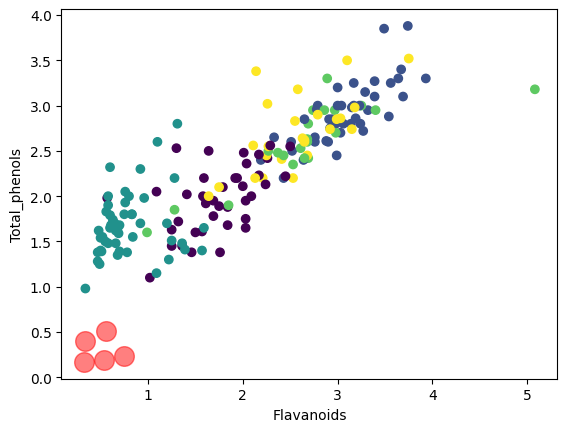

In [ ]:
plt.xlabel('Flavanoids') #etiqueta en x
plt.ylabel('Total_phenols') #etiqueta en y
plt.scatter(x='Flavanoids', y='Total_phenols', data=df_as, c=kmeans.labels_) #diagramde xy de puntos coloreados según sus clusters
plt.scatter(x=centroids[:,0], y=centroids[:,1], s=200, alpha=.5, c='red') #plotear los centroides con transparencia de 50%, de tamaño 200 y de color rojo
plt.show()

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

$inertia=\sum_{p\in P}((x_i-x_c)^2+(y_i-y_c)^2)$

In [ ]:
inertia = [] #lista vacía para valores de inercia
for k in range(2,11): #para valores de k de 2 a 10
  algo = KMeans(n_clusters=k) #calcular kmeans con k clusters
  algo.fit(df_) #aplicar kmeans al dataframe
  inertia.append(algo.inertia_) #la propiedad inertia_ de kmeans devuelve el valor de inercia obtenido
print(inertia)

[1658.758852429095, 1277.9284888446423, 1175.3789993448738, 1111.1286561414506, 1044.856806274015, 979.2540451926147, 948.7085205367263, 899.8371697892605, 858.3705680972591]


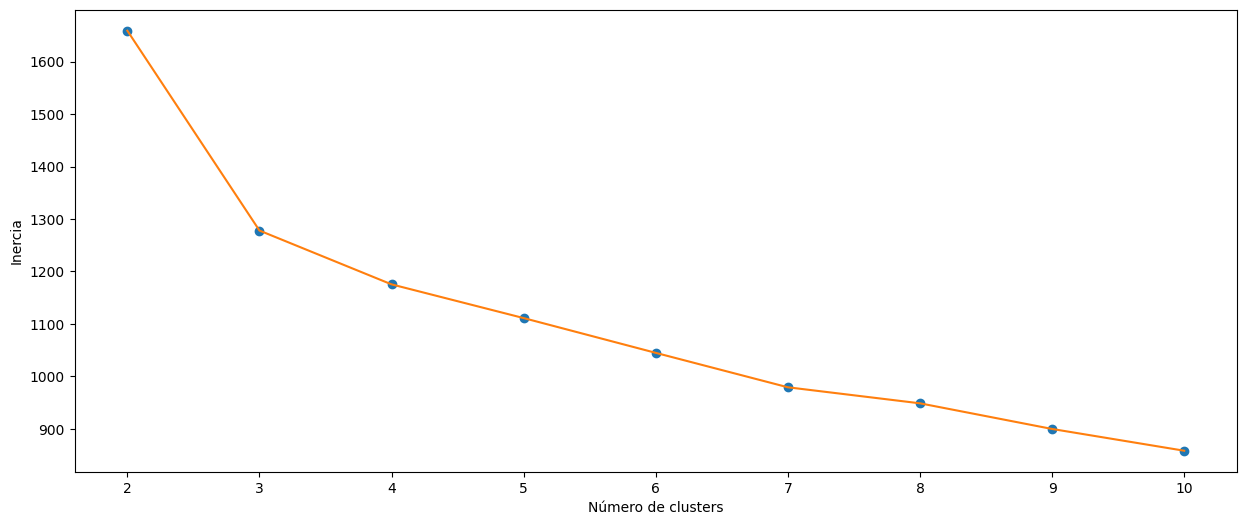

In [ ]:
plt.figure(figsize=(15,6))

plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.plot(np.arange(2,11), inertia, 'o') #plotear puntos según valor de inercia
plt.plot(np.arange(2,11), inertia, '-') #plotear una línea de inercia

plt.show()

In [ ]:
def cambio(i,j):
  return (inertia[i-2] - inertia[j-2]) / (j - i)

for k in range(2,9):
  print('El cambio de k={} a k={} es {}, el cambio de k={} a k={} es {}, el ratio entre ambos es {}'.format(k,k+1,cambio(k,k+1),k+1,k+2,cambio(k+1,k+2),(cambio(k,k+1)/cambio(k+1,k+2))))

El cambio de k=2 a k=3 es 380.8303635844527, el cambio de k=3 a k=4 es 102.54948949976847, el ratio entre ambos es 3.713625152520262
El cambio de k=3 a k=4 es 102.54948949976847, el cambio de k=4 a k=5 es 64.2503432034232, el ratio entre ambos es 1.5960924780601753
El cambio de k=4 a k=5 es 64.2503432034232, el cambio de k=5 a k=6 es 66.27184986743555, el ratio entre ambos es 0.9694967521193991
El cambio de k=5 a k=6 es 66.27184986743555, el cambio de k=6 a k=7 es 65.60276108140033, el ratio entre ambos es 1.0101990949009754
El cambio de k=6 a k=7 es 65.60276108140033, el cambio de k=7 a k=8 es 30.54552465588847, el ratio entre ambos es 2.147704510577252
El cambio de k=7 a k=8 es 30.54552465588847, el cambio de k=8 a k=9 es 48.871350747465726, el ratio entre ambos es 0.6250190385309218
El cambio de k=8 a k=9 es 48.871350747465726, el cambio de k=9 a k=10 es 41.466601692001404, el ratio entre ambos es 1.1785713985067805


### 2. Segmentation using  Annual Income and Spending Score

In [ ]:
df2 = df[['0D280_0D315_of_diluted_wines', 'Total_phenols']]
inertia = [] #lista vacía para valores de inercia
for k in range(2,11): #para valores de k de 2 a 10
  algo = KMeans(n_clusters=k) #calcular kmeans con k clusters
  algo.fit(df2) #aplicar kmeans al dataframe
  inertia.append(algo.inertia_) #la propiedad inertia_ de kmeans devuelve el valor de inercia obtenido
print(inertia)

[51.30424051362684, 35.55671440476192, 29.01359016514214, 23.921854903222723, 19.81784881343754, 16.789992123015875, 14.215652922077918, 12.67651943121693, 11.171381061270598]


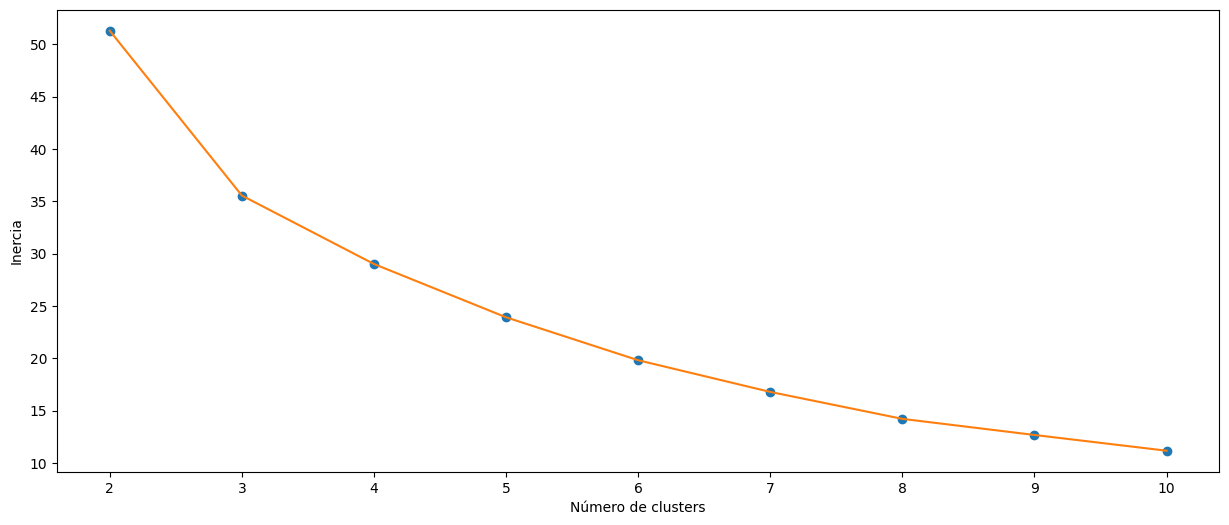

In [ ]:
plt.figure(figsize=(15,6))

plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.plot(np.arange(2,11), inertia, 'o') #plotear puntos según valor de inercia
plt.plot(np.arange(2,11), inertia, '-') #plotear una línea de inercia

plt.show()

In [ ]:
for k in range(2,9):
  print('El cambio de k={} a k={} es {}, el cambio de k={} a k={} es {}, el ratio entre ambos es {}'.format(k,k+1,cambio(k,k+1),k+1,k+2,cambio(k+1,k+2),(cambio(k,k+1)/cambio(k+1,k+2))))

El cambio de k=2 a k=3 es 15.747526108864918, el cambio de k=3 a k=4 es 6.543124239619779, el ratio entre ambos es 2.4067288854933935
El cambio de k=3 a k=4 es 6.543124239619779, el cambio de k=4 a k=5 es 5.091735261919418, el ratio entre ambos es 1.2850480048629305
El cambio de k=4 a k=5 es 5.091735261919418, el cambio de k=5 a k=6 es 4.104006089785184, el ratio entre ambos es 1.2406743924168822
El cambio de k=5 a k=6 es 4.104006089785184, el cambio de k=6 a k=7 es 3.0278566904216646, el ratio entre ambos es 1.3554162265234728
El cambio de k=6 a k=7 es 3.0278566904216646, el cambio de k=7 a k=8 es 2.574339200937956, el ratio entre ambos es 1.176168505424021
El cambio de k=7 a k=8 es 2.574339200937956, el cambio de k=8 a k=9 es 1.5391334908609888, el ratio entre ambos es 1.6725899450721944
El cambio de k=8 a k=9 es 1.5391334908609888, el cambio de k=9 a k=10 es 1.5051383699463319, el ratio entre ambos es 1.0225860436445249


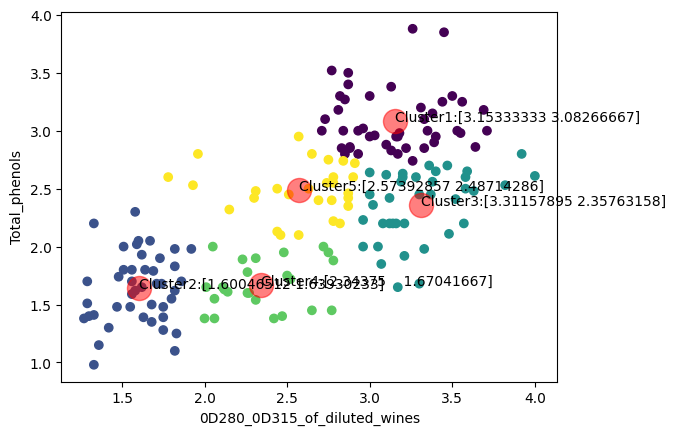

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2)
labels2 = kmeans.labels_
#print(labels2)
centroids2 = kmeans.cluster_centers_
#print(centroids2)

plt.xlabel('0D280_0D315_of_diluted_wines')
plt.ylabel('Total_phenols')
plt.scatter(x='0D280_0D315_of_diluted_wines', y='Total_phenols', data=df2, c=labels2)
plt.scatter(x=centroids2[:,0], y=centroids2[:,1], s=300, c='red', alpha=.5)

i = 0
for c in centroids2:
  i += 1
  plt.annotate('Cluster' + str(i) + ':' + str(c), xy=c)

plt.show()

#3. Segmentation using Age, Annual Income and Spending Score

In [ ]:
df3 = df[['Flavanoids', '0D280_0D315_of_diluted_wines', 'Total_phenols']]
inertia = [] #lista vacía para valores de inercia
for k in range(2,11): #para valores de k de 2 a 10
  algo = KMeans(n_clusters=k) #calcular kmeans con k clusters
  algo.fit(df3) #aplicar kmeans al dataframe
  inertia.append(algo.inertia_) #la propiedad inertia_ de kmeans devuelve el valor de inercia obtenido
print(inertia)

[102.29376237623761, 64.80460973274555, 52.220413564589975, 45.55326271463623, 40.739563946706866, 36.79844853896104, 32.84855626381724, 29.344489955455174, 26.429378580162528]


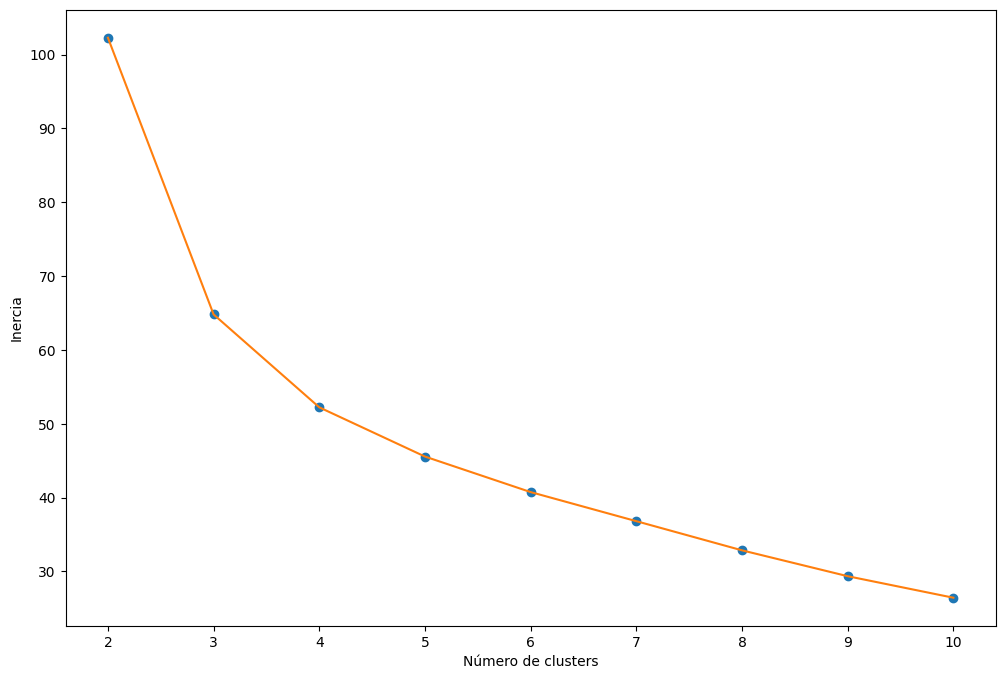

In [ ]:
plt.figure(figsize=(12,8))

plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.plot(np.arange(2,11), inertia, 'o') #plotear puntos según valor de inercia
plt.plot(np.arange(2,11), inertia, '-') #plotear una línea de inercia

plt.show()

In [ ]:
for k in range(2,9):
  print('El cambio de k={} a k={} es {}, el cambio de k={} a k={} es {}, el ratio entre ambos es {}'.format(k,k+1,cambio(k,k+1),k+1,k+2,cambio(k+1,k+2),(cambio(k,k+1)/cambio(k+1,k+2))))

El cambio de k=2 a k=3 es 37.48915264349206, el cambio de k=3 a k=4 es 12.584196168155572, el ratio entre ambos es 2.9790661352179746
El cambio de k=3 a k=4 es 12.584196168155572, el cambio de k=4 a k=5 es 6.667150849953742, el ratio entre ambos es 1.8874923413864084
El cambio de k=4 a k=5 es 6.667150849953742, el cambio de k=5 a k=6 es 4.813698767929367, el ratio entre ambos es 1.3850369895126706
El cambio de k=5 a k=6 es 4.813698767929367, el cambio de k=6 a k=7 es 3.9411154077458264, el ratio entre ambos es 1.2214051784600304
El cambio de k=6 a k=7 es 3.9411154077458264, el cambio de k=7 a k=8 es 3.949892275143803, el ratio entre ambos es 0.9977779476536086
El cambio de k=7 a k=8 es 3.949892275143803, el cambio de k=8 a k=9 es 3.504066308362063, el ratio entre ambos es 1.1272310303369049
El cambio de k=8 a k=9 es 3.504066308362063, el cambio de k=9 a k=10 es 2.9151113752926463, el ratio entre ambos es 1.2020351393985047


In [ ]:
kmeans = KMeans(6)
kmeans.fit(df3)
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

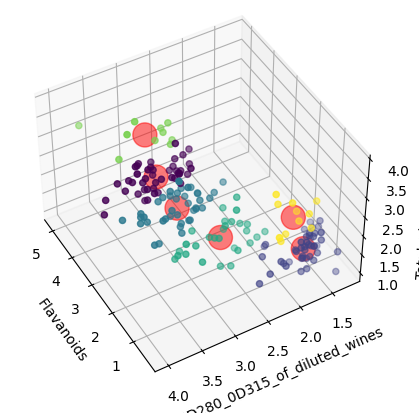

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Flavanoids')
ax.set_ylabel('0D280_0D315_of_diluted_wines')
ax.set_zlabel('Total_phenols')

ax.view_init(45,150) #45 grados de rotación en z, 150 de elevación en x

ax.scatter(df3['Flavanoids'],
           df3['0D280_0D315_of_diluted_wines'],
           df3['Total_phenols'],
           c=labels3,
           marker='o')
ax.scatter(centroids3[:,0],centroids3[:,1],centroids3[:,2], s=300, c='red', alpha=.5)
plt.show()

In [ ]:
print(labels3)

[0 0 0 4 0 4 2 2 0 0 0 2 2 4 4 0 0 0 4 0 0 2 0 2 2 2 0 2 0 2 0 0 2 0 2 0 2
 2 2 0 0 2 4 2 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 1 5 5 3 0 3 2 0 2 5 3 1 0 3 0
 2 3 3 3 3 2 2 2 3 3 2 2 3 3 3 3 3 3 1 2 2 2 1 2 4 0 2 3 2 3 2 3 3 3 2 0 0
 2 3 3 2 2 3 3 1 3 0 4 2 2 0 2 0 3 2 3 1 1 1 1 1 1 1 1 1 5 1 1 1 5 1 1 1 1
 1 1 1 1 5 1 1 1 1 1 5 5 5 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 5]


In [ ]:
print(centroids3)

[[3.02840909 3.18454545 2.90704545]
 [0.77933333 1.70044444 1.556     ]
 [2.3875     3.08375    2.47875   ]
 [1.71142857 2.65464286 1.87678571]
 [3.794      3.1        3.405     ]
 [1.04818182 1.77818182 2.25909091]]


In [ ]:
df_interpretation = df.copy() #copy() crear un objeto copia
df_interpretation['Cluster'] = labels3
df_interpretation

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,4
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1
